### Terminology

- Concrete Creator : class or method that calls the creator
- Product Interface : interface that describes the attributes and methods that are required for Factory
- Creator : Factory class.
- Concrete product : The object returned from the factory. 

### Source code
In this concept exmpla,e the client wants an object named b.<br>
Rather than creating b directly, it asks the creator (factory) for the object instead.<br>

The factory finds the relevant class using some kind of logic from the attributes of the request. 

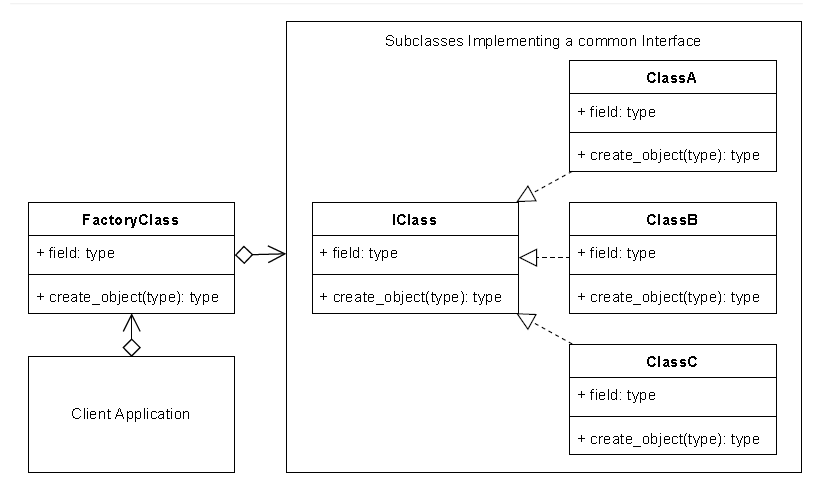

In [6]:
from PIL import Image
im = Image.open("Factory.png")
im

In [18]:
from abc import ABC, abstractmethod

class IProduct(ABC):
    "A Hypothetical Class Interface (Product)"
    
    @staticmethod
    @abstractmethod
    def create_object():
        "An abstract interface method"
        

class ConcreteProductA(IProduct):
    "A Concrete Class that implements the IProduct interface"
    
    def __init__(self):
        self.name = "ConcreteProductA"
    def create_object(self):
        return self
    
class ConcreteProductB(IProduct):
    "A Concrete Class that implements the IProduct interface"
    
    def __init__(self):
        self.name = "ConcreteProductB"
    def create_object(self):
        return self

class ConcreteProductC(IProduct):
    "A Concrete Class that implements the IProduct interface"
    
    def __init__(self):
        self.name = "ConcreteProductC"
    def create_object(self):
        return self
    
class Creator:
    "The Factory Class"
    @staticmethod
    def create_object(some_property):
        "A Static method to get a concrete product"
        if some_property == "a":
            return ConcreteProductA()
        if some_property == 'b':
            return ConcreteProductB()
        if some_property == "c":
            return ConcreteProductC()
        return None
    
#The Client
PRODUCT = Creator.create_object("b") 
PRODUCT2 = Creator().create_object("a")
print(PRODUCT.name)
print(PRODUCT2.name)

ConcreteProductB
ConcreteProductA


### Use case
An example use case is a user interface where the user can select from a menu of items such as chairs

In [25]:
from abc import ABC, abstractmethod
from dataclasses import dataclass

class IChair(ABC):
    "An abstract interface (Chair)"
    @staticmethod
    @abstractmethod
    def get_dimensions()-> dict:
        "An abstract interface for dimensions" 

@dataclass
class SmallChair(IChair):
    _height : int = 40
    _width : int = 40
    _depth : int =40 
    
    def get_dimensions(self) -> dict:
        return {
            "height":self._height,
            "width":self._width,
            "depth":self._depth
        }
        
@dataclass
class MediumChair(IChair):
    _height : int = 60
    _width : int = 60
    _depth : int = 60
    
    def get_dimensions(self) -> dict:
        return {
            "height":self._height,
            "width":self._width,
            "depth":self._depth
        }

@dataclass
class BigChair(IChair):
    _height : int = 80
    _width : int = 80
    _depth : int = 80
    
    def get_dimensions(self) -> dict:
        return {
            "height":self._height,
            "width":self._width,
            "depth":self._depth
        }
        
class ChairFactory:
    CHOICE ={"BigChair":BigChair(),
             "MediumChair":MediumChair(),
             "SmallChair":SmallChair()}
    
    @staticmethod
    def get_chair(chair):
        if chair in ChairFactory.CHOICE :
            return ChairFactory.CHOICE[chair]

CHAIR = ChairFactory.get_chair("SmallChair")
print(CHAIR.get_dimensions())

{'height': 40, 'width': 40, 'depth': 40}


### Conding concepts

#### ABC(Abstract Base Class)
The benefit of using ABC classes is that your IDE and IDE and Pylint will indicate to you at development time whether your inheriting classes conform to the class definition. <br><br>

While it's possible to ensure your classes are correct without using ABC, it's often easier to use ABC as a backup method of checking correctness.<br><br>

Note that in the example above, ABC didn't require a *self* or *cls* due to the use of @staticmethod. 

